In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon,mannwhitneyu,levene,shapiro,bartlett,chi2_contingency
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system

from sklearn import metrics

### Data description

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes')
6 - Balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (categorical: 'no','yes')
8 - loan: has personal loan? (categorical: 'no','yes')
    
    
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
10 - day: last contact day of the month
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')    
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success', 'unknown')

    

Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
data=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/capstone project/New_Capstones/Group 7_BankMarketting/bank-full.csv",sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#we shall rename few features for better understanding
data.rename({'housing': "housing loan", 'loan': 'personal loan', 'default': 'defaulter',"previous":"previous_count","campaign":"campaign_curr_count" }, axis=1, inplace=True)

In [4]:
data.head()

,age,job,marital,education,defaulter,balance,housing loan,personal loan,contact,day,month,duration,campaign_curr_count,pdays,previous_count,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

# checking null values


In [6]:
data.isnull().sum()

age                    0
job                    0
marital                0
education              0
defaulter              0
balance                0
housing loan           0
personal loan          0
contact                0
day                    0
month                  0
duration               0
campaign_curr_count    0
pdays                  0
previous_count         0
poutcome               0
y                      0
dtype: int64

In [7]:
#there is no null value

# checking whether data is imbalanced.

In [8]:
data['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

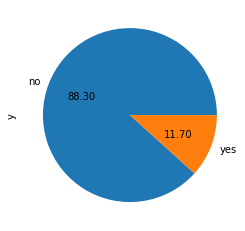

In [9]:
(data['y'].value_counts(normalize=True)*100).plot(kind="pie",autopct='%.2f')
plt.show()

#the target variable is moderately high in imbalance.
88.3% of the customer hasnt taken term deposit and only 11.7 % has opted for term deposit.

# Exloratory Data Analysis

#### 1.univaraite Analysis

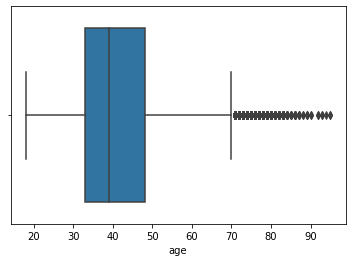

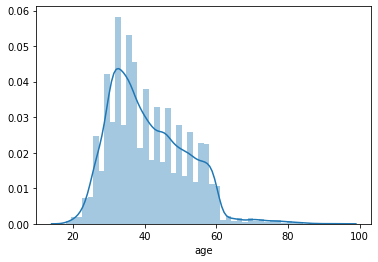

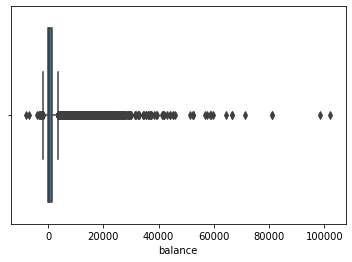

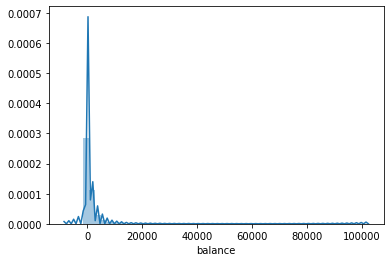

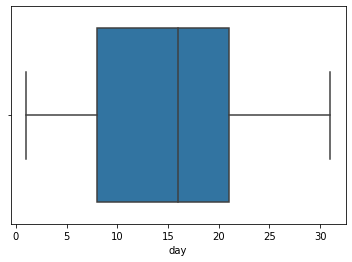

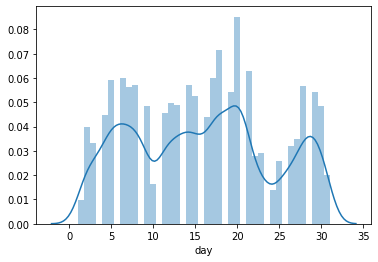

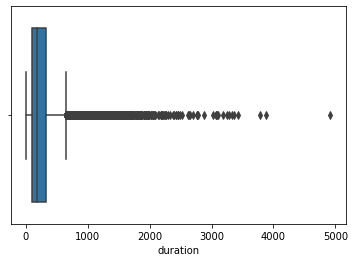

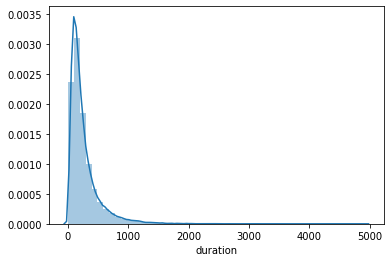

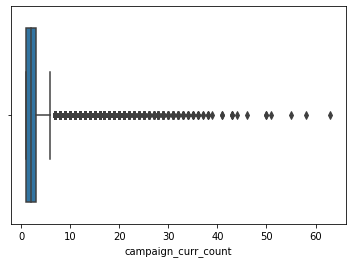

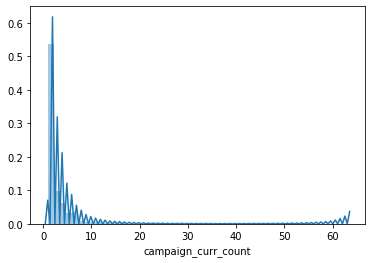

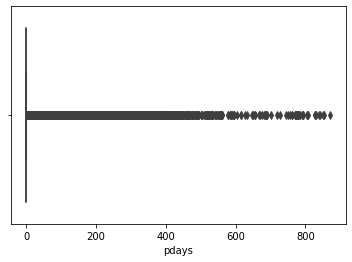

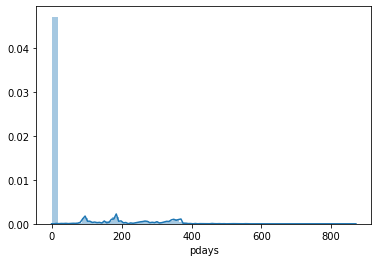

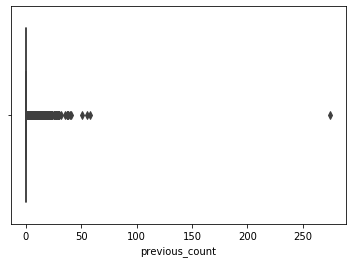

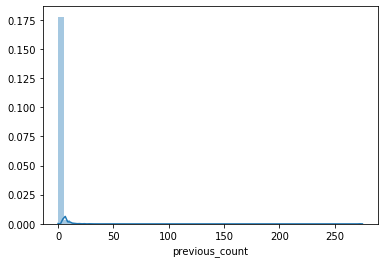

In [10]:
x= data.columns
l=len(x)

for i in range(0,l):
    if data[x[i]].dtypes != 'object':
        sns.boxplot(data[x[i]])
        plt.show()
        sns.distplot(data[x[i]])
        plt.show()

1) boxplot are showing that few features have outliers. we can confirm this after further EDA.
2) few features shows the possibility of feature transformation as they are not normally distributed.

### Bivaraite Analysis

##### Age vs Target

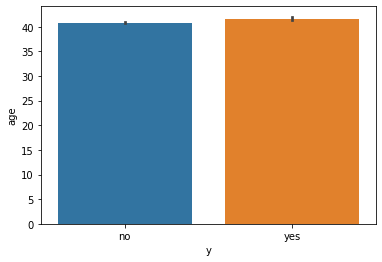

In [11]:
sns.barplot(x='y',y='age',data=data)
plt.show()

#we can see average age of people taking term loan and people not taking term loan are almost same.
we shall do statistical test to make sure whether this feature is relevant towards target feature.

In [12]:
import scipy
scipy.stats.shapiro(data['age'])

C:\sajan\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9605178833007812, 0.0)

h0: data is normally distributed
h1: data is not noramally distributed
as the pvalue from the test is less than 0.05 significance level, data is not normally distributed and we shall go ahead with non parametric test
(non parametric test fpr 2 sample t test is mann whiteny u test)

### mann whitney u test for checking whether age is significant factor or not

h0: mean-age of people who took term loan = mean-age of people who didnt take term loan
h1: mean-age of people who took term loan != mean-age of people who didnt take term loan

In [13]:
scipy.stats.mannwhitneyu(data[data['y']=='yes']['age'],data[data['y']=='no']['age'])

MannwhitneyuResult(statistic=103915109.5, pvalue=0.031408955093487935)

as p value is less than 0.05, h1 is tur and we can see mean age are different and hence feature age can be a significant feature towrds target feature.

#### job vs target

In [14]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

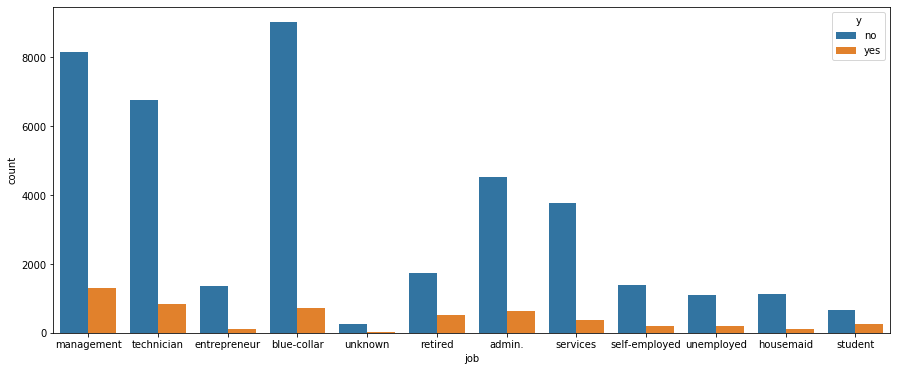

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='job',hue='y',data=data)
plt.show()

##### Inferences:

""" 
On analysing the above graph we can see: (not a percentile based observation) 
- Most of the term deposits are taken by people:
    - Management field 
    - Technician
    - Blue collar
    - Admin 
    - Retired
    
    
- Most people not taking the loan are: 
    - Blue collar
    - Management
    - technician
    - admin
    - service
"""

#### marital vs target

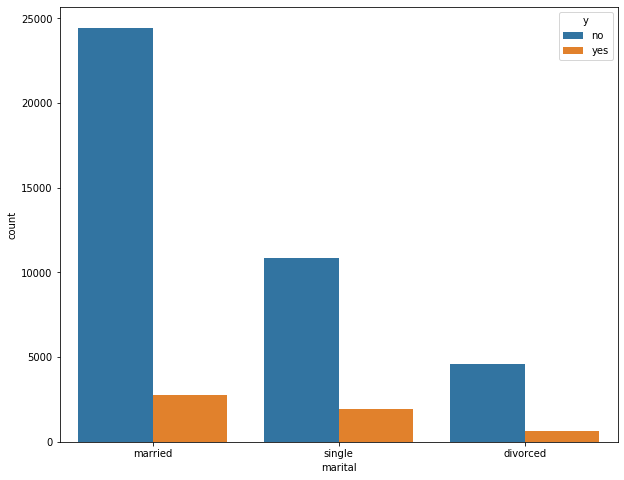

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='marital',hue= 'y', data=data)
plt.show()

## Inferences:

""" 
On analysing the above graph we can see: (not a percentile based observation) 
- Most of the term deposits are taken by people:
    - Married
    - Single
    - Divorced(this include divorced and widowers)

    
    
- Most people not taking the loan are: 
    - Married
    - Single
    - Divorced(this include divorced and widowers)
"""

#### education vs target

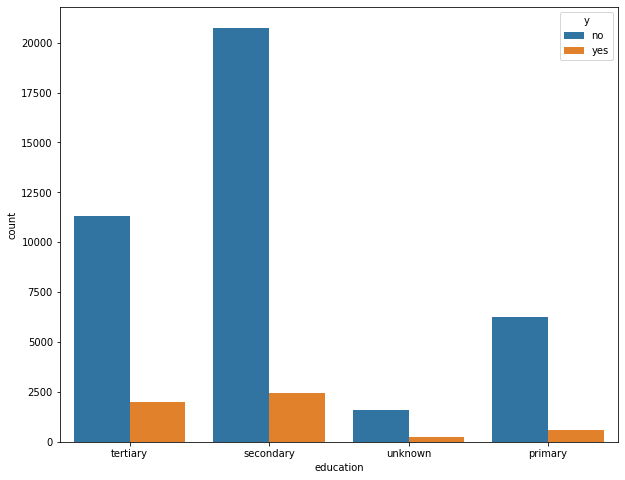

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x='education',hue= 'y', data=data)
plt.show()

In [18]:
pd.crosstab(data['education'], data['y'], normalize=True)*100

y,no,yes
education,,
primary,13.846188,1.307204
secondary,45.900334,5.419035
tertiary,25.004977,4.414855
unknown,3.550021,0.557386


""" 
On analysing the above graph we can see: (not a percentile based observation) 
- Most of the term deposits are taken by people:
    - Secondary
    - tertiary
    - primary

    
    
- Most people not taking the loan are: 
    - Secondary
    - tertiary
    - primary
"""

#### "defaulter" vs target

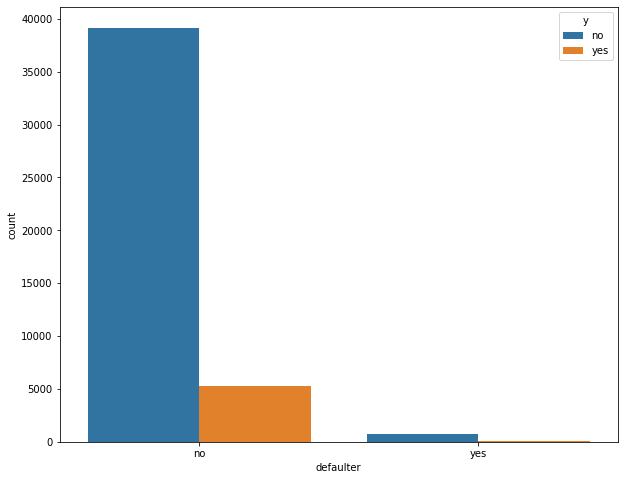

In [19]:

plt.figure(figsize=(10,8))
sns.countplot(x='defaulter',hue= 'y', data=data)
plt.show()

In [20]:
pd.crosstab(data['defaulter'], data['y'], normalize=True)*100

y,no,yes
defaulter,,
no,86.613877,11.583464
yes,1.687642,0.115016


# inference:
"""
Most people who are non defaulters are given loan also they have also rejected to take loans
"""

#### balance vs target

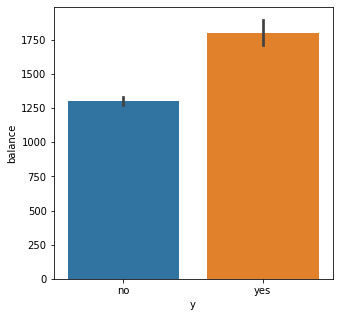

In [21]:

plt.figure(figsize=(5,5))
sns.barplot(x='y',y='balance', data=data)
plt.show()

In [22]:
# inference:

"""
Most people taken he term deposits have an average Balance higher than people with lesser average balance

"""

'\nMost people taken he term deposits have an average Balance higher than people with lesser average balance\n\n'

#### housing loan vs target

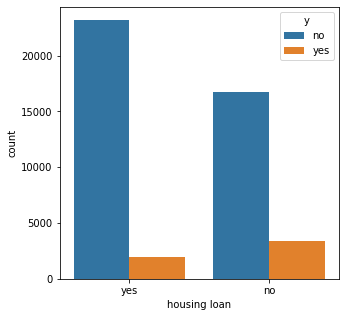

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='housing loan',hue= 'y', data=data)
plt.show()

In [24]:
pd.crosstab(data['housing loan'], data['y'], normalize=True)*100

y,no,yes
housing loan,,
no,36.997633,7.418549
yes,51.303886,4.279932


In [25]:
# inference:


"""
the most term deposits are taken by people without housing loans 


"""

'\nthe most term deposits are taken by people without housing loans \n\n\n'

#### Personal loan vs target

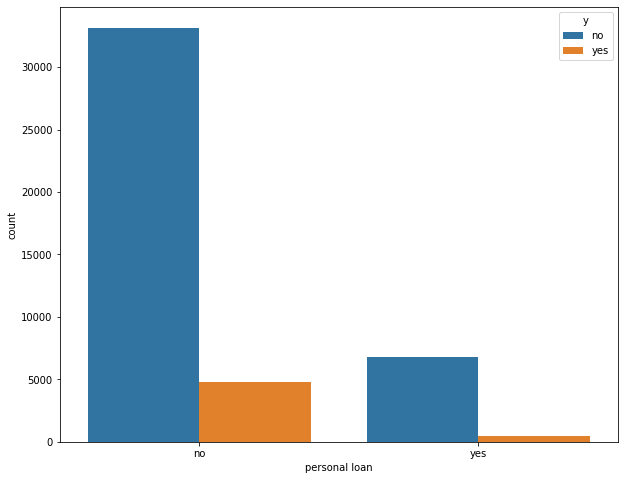

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='personal loan',hue= 'y', data=data)
plt.show()

In [27]:
pd.crosstab(data['personal loan'], data['y'], normalize=True)*100

y,no,yes
personal loan,,
no,73.349406,10.627945
yes,14.952113,1.070536


In [28]:
# inference:


"""
the most term deposits are taken by people without Personal loans 


"""

'\nthe most term deposits are taken by people without Personal loans \n\n\n'

#### contact vs target

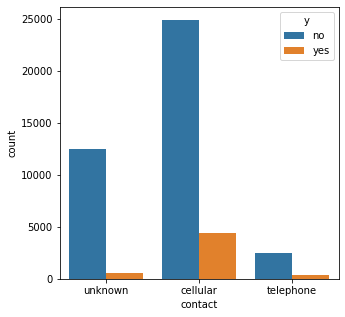

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='contact',hue= 'y', data=data)
plt.show()

In [30]:
pd.crosstab(data['contact'], data['y'], normalize=True)*100

y,no,yes
contact,,
cellular,55.110482,9.663577
telephone,5.565017,0.862622
unknown,27.626020,1.172281


In [31]:
# inference:


"""
the most term deposits are taken by people contacted through Celluar network


"""

'\nthe most term deposits are taken by people contacted through Celluar network\n\n\n'

#### "day" vs target

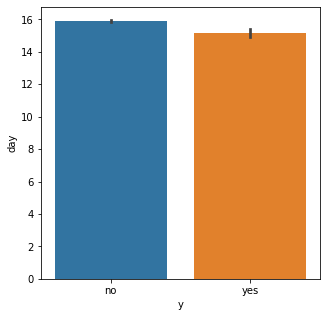

In [32]:

plt.figure(figsize=(5,5))
sns.barplot(x='y',y='day', data=data)
plt.show()

In [33]:
# inference:


"""
the most term deposits are taken by people on an average on 15th of every month


"""

'\nthe most term deposits are taken by people on an average on 15th of every month\n\n\n'

#### month vs target

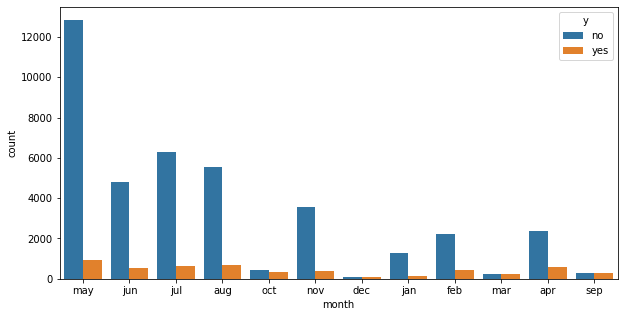

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue= 'y', data=data)
plt.show()

In [35]:
# inference:


"""
The following month have high peak: 
  - May
  - July
  - Aug
  - Jun
  - nov
  
Also more number of term deposits are taken in these months. 


But if we look at the months: Sep, Mar, Dec, Oct: 
even though the number of people contacted are less, but when checking on a proportion the amount of people
taking term deposits are more.


"""

'\nThe following month have high peak: \n  - May\n  - July\n  - Aug\n  - Jun\n  - nov\n  \nAlso more number of term deposits are taken in these months. \n\n\nBut if we look at the months: Sep, Mar, Dec, Oct: \neven though the number of people contacted are less, but when checking on a proportion the amount of people\ntaking term deposits are more.\n\n\n'

#### duration vs target

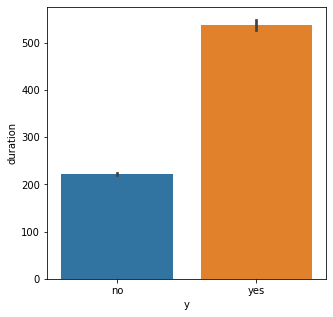

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x='y', y='duration' ,data=data)
plt.show()

#people who took term depsits have talked more than people who havent. so, if people enquired more about the term deposits, chances of them taking the depsoit is high

#### campaign_curr_count vs target

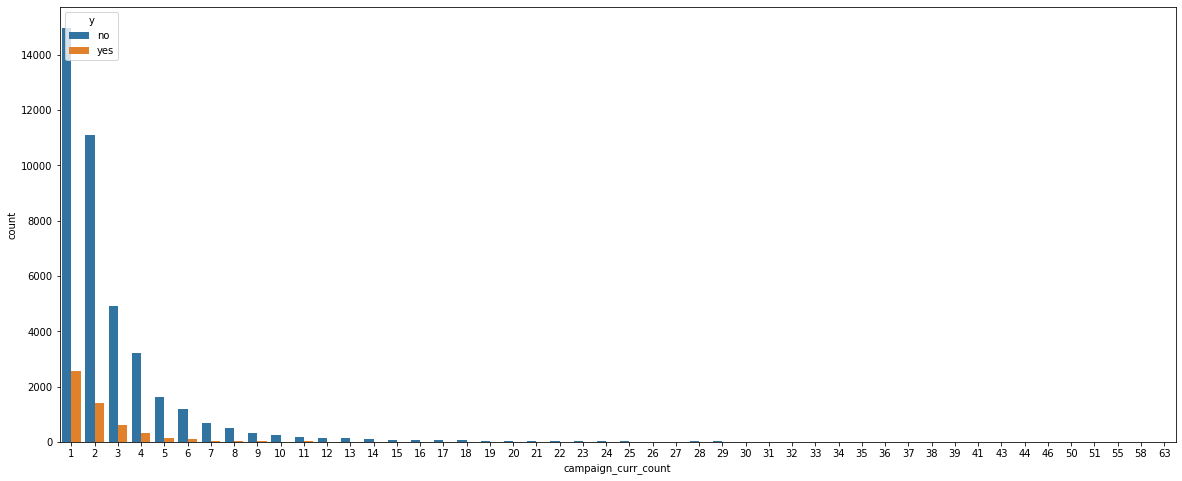

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(x='campaign_curr_count',hue= 'y', data=data)
plt.show()

# people who have been contacted till 8 times are more likely to take term deposits.
this means constant follow up with the customers are needed to influence them to take term deposits.

#### pdays vs target

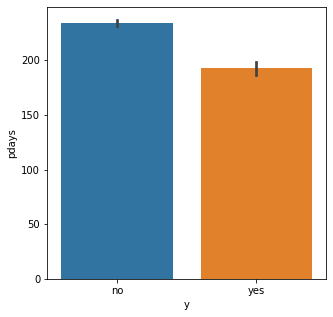

In [39]:
plt.figure(figsize=(5,5))
sns.barplot(x='y', y=data[data['pdays']!=-1]['pdays'] ,data=data)
plt.show()


people who havnt contacted for long time are less likely to take term depsoits.
we can see people who took term deposits have been contacted soon after last campaign. 

#### previous vs target

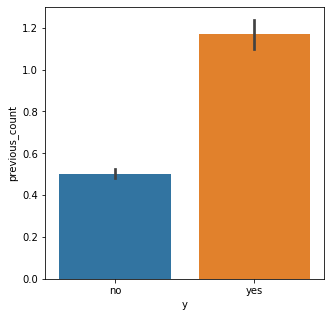

In [40]:
plt.figure(figsize=(5,5))
sns.barplot(x='y', y= 'previous_count', data=data)
plt.show()

########
people who have been called more times till this campaign are more likely to take term deposits.
from last two visulaizations we can assume the current campaign is running favourable schemes for the customers.
hence, the more(duration and count) we can inform the people about this scheme may convert them into customers.

#### poutcome vs target

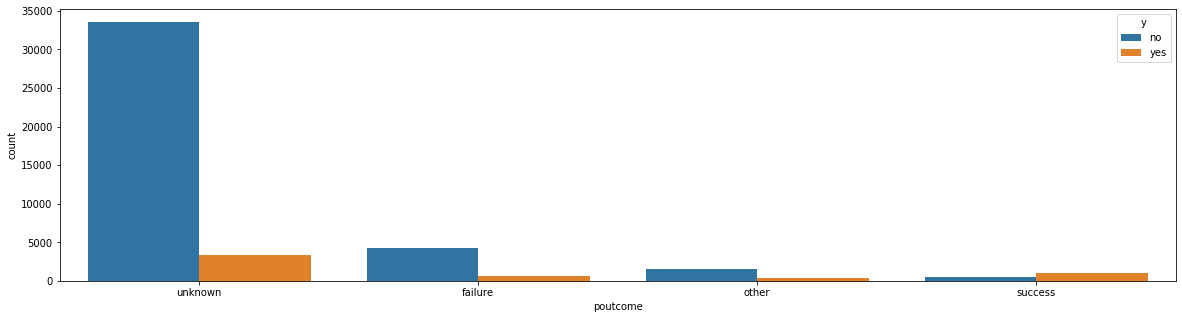

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(x='poutcome',hue= 'y', data=data)
plt.show()

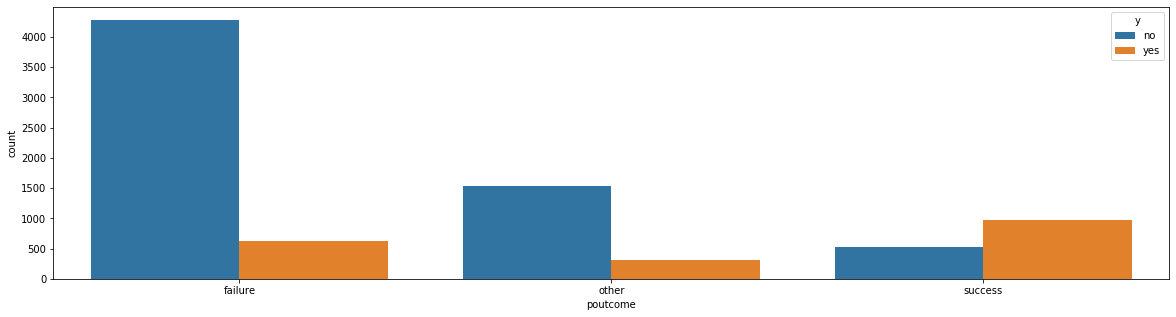

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x=data[data['poutcome']!="unknown"]['poutcome'],hue= 'y', data=data)
plt.show()


In [43]:
# number of people who took term deposits in previous campaign are more in this data. hence, 

In [44]:
data[data['poutcome']=="success"]['y'].value_counts(normalize=True)

yes    0.647253
no     0.352747
Name: y, dtype: float64

In [45]:
# customers who have taken term deposits in previous campaigns are more likely to take term deposits.

# marital status vs balance

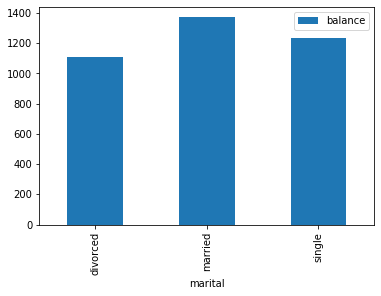

In [95]:
(data[data['y']=='no'].groupby(['marital']).agg({"balance":'mean'}) ).plot(kind='bar')

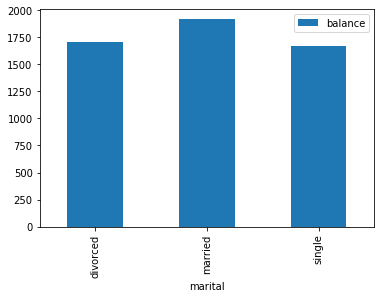

In [96]:
(  data[data['y']=='yes'].groupby(['marital']).agg({"balance":'mean'})  ).plot(kind='bar')


inference:
    we can see average yearly balance of customer who have taken term deposits are higher than customer who havent.
    hence,we can assume people having higher balance are willing to take another term deposit.

# statistical test for checking feature significance.

In [46]:
num_cols=data.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign_curr_count', 'pdays',
       'previous_count'],
      dtype='object')

In [47]:
g=data.groupby('y')

In [48]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
result=[]
for i in num_cols[:-1]:
    g=data.groupby('y')
    df_1=g.get_group('yes')[i].values
    df_0=g.get_group('no')[i].values
    shap=shapiro(data[i])[1]
    
    if shap>=.05:
        var=levene(data[i])[1]
        if var >=.05:
            pvalue=ttest_ind(df_1,df_0)[1]
            print(pvalue,'is the pvalue of the feature',i,'by test -','ttest_idn')
            result.append(pvalue)
        else:
            pvalue=mannwhitneyu(df_1,df_0)[1]
            print(pvalue,'is the pvalue of the feature',i,'by test -','mannwhitney')
            result.append(pvalue)
    else:
        pvalue=mannwhitneyu(df_1,df_0)[1]
        print(pvalue,'is the pvalue of the feature',i,'by test -','mannwhitney')
        result.append(pvalue)

0.031408955093487935 is the pvalue of the feature age by test - mannwhitney
3.296922904344571e-101 is the pvalue of the feature balance by test - mannwhitney
1.6630393167944684e-10 is the pvalue of the feature day by test - mannwhitney
0.0 is the pvalue of the feature duration by test - mannwhitney
9.742452436952554e-72 is the pvalue of the feature campaign_curr_count by test - mannwhitney
1.2420588251888467e-235 is the pvalue of the feature pdays by test - mannwhitney


as pvalue of all numerical features are greater than 0.05, these features are significant in nature towards target variable.

# checking statistical significance of categorical data

In [49]:
cat_cols=list(data.select_dtypes(include=['object']).columns)
from scipy.stats import chi2_contingency
from statsmodels.stats import proportion


for i in cat_cols:
    ct=pd.crosstab(data['y'],data[i])
    pvalue=chi2_contingency(ct)[1]
    print(pvalue, 'is the pvalue of the feature',i,'by test of proportions')


3.337121944935502e-172 is the pvalue of the feature job by test of proportions
2.1450999986791486e-43 is the pvalue of the feature marital by test of proportions
1.6266562124072994e-51 is the pvalue of the feature education by test of proportions
2.4538606753508344e-06 is the pvalue of the feature defaulter by test of proportions
2.918797605076633e-192 is the pvalue of the feature housing loan by test of proportions
1.665061163492756e-47 is the pvalue of the feature personal loan by test of proportions
1.251738325340495e-225 is the pvalue of the feature contact by test of proportions
0.0 is the pvalue of the feature month by test of proportions
0.0 is the pvalue of the feature poutcome by test of proportions
0.0 is the pvalue of the feature y by test of proportions


inference:
    as the pvalue of all categorical features are less than 0.05, we can say alternate hypoethesis is true( there is a difference in proportion of classes in the features)

# checking multicollinearity

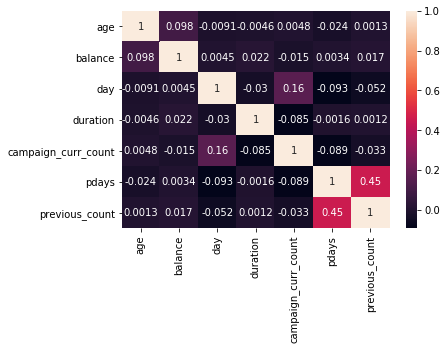

In [50]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [51]:
# there is a strong positive correlation between pdays and previous_count
#there is a mild positive correlation between days and campaign_curr_count

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age                    45211 non-null int64
job                    45211 non-null object
marital                45211 non-null object
education              45211 non-null object
defaulter              45211 non-null object
balance                45211 non-null int64
housing loan           45211 non-null object
personal loan          45211 non-null object
contact                45211 non-null object
day                    45211 non-null int64
month                  45211 non-null object
duration               45211 non-null int64
campaign_curr_count    45211 non-null int64
pdays                  45211 non-null int64
previous_count         45211 non-null int64
poutcome               45211 non-null object
y                      45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Understanding of the problem: 

There are around 16 independent variables given for the analysis in both the sheets. 

- Amoung the 16, DURATION should be dropped as it does not gives us an idea on whether or not the Customer will Purchase or take the TERM DEPOSIT.
before we make a call to the customer.


- On further analysing we can see there is a slight Multicollinearity of variables pdays and Previous(0.45).

- Also even though there are no NULL values. We have many UNKNOWN values which we need to handel based on the column in which it occurs.
    Columns having Unknown values are: 
        - Poutcomes
        - Education
        - Contact
        - Job
        
- Different techniques to be used: 
    - Dummy encoding
    - Label encoding within the columns, based on the importance of each subdivisions in it. 
    
    
-------------------------------------------------------------------------------------------------------------------------------

Machine Learning: 
    
    Here we are supposed to predict whether the user will take term deposit or not. Since being a Classificaion problem,
    we need to use different classification algorithms, do hyper tuning also ensemble methods to improve the model. 
    
    Here there are chances of :
        - Type 1 error(FP): Is the condition of Incorrectly predicting an user will take term deposit, but in reality he won't
            take the Term deposit. This incorrect prediction might cause calling the uninterested customer and wasting money.
            But in some countries it might lead to another issues resulting in customer complaints.
            

        - Type 2 error(FN): Is the condition of Incorrectly predicting the User will not take Term deposit, but in reality he
            will take the Term deposit. Here this incorrect prediction will cause loss in business. 
            
** Since We are going to focus more on reducing the Type 1 error. We will be more focused on PRECISION, RECALL along with Accuracy score. 



- From the analysis, we are now going to build the base model.


1. In base model creation we are not doing any:
    - Outlier treatment
    - also there needs some analysis on how to handel the Unknown values in different columns.
    - The data points are not Normalized
    
    
2. On the base model we focus on different metrics like:
    - Accuracy
    - Precision
    - Confusion Matrix
    
3. Once the base model is done, we can do smote and see whether is improves the performance of the model.

# further data exploration

In [55]:
for i in data.columns:
    print(i)
    print(data[i].dtypes)
    print("unique classes are :",data[i].nunique() )
    print(data[i].value_counts(normalize=True)*100)
    print()

age
int64
unique classes are : 77
32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
36    3.994603
30    3.886222
37    3.751299
39    3.289023
38    3.242574
40    2.997058
41    2.855500
42    2.747119
45    2.689611
29    2.621044
46    2.598925
43    2.567959
44    2.512663
47    2.406494
28    2.295901
48    2.205216
49    2.198580
50    2.076928
51    2.070293
52    2.014996
27    2.010573
53    1.970759
57    1.831413
54    1.793811
55    1.782752
        ...   
67    0.119440
71    0.119440
72    0.115016
20    0.110593
77    0.097321
73    0.097321
69    0.097321
75    0.086262
74    0.081838
68    0.079627
19    0.077415
76    0.070779
80    0.068567
78    0.066356
79    0.055296
83    0.048661
82    0.042025
81    0.037601
18    0.026542
84    0.019907
86    0.019907
85    0.011059
87    0.008847
89    0.006636
88    0.004424
90    0.004424
92    0.004424
93    0.004424
95    0.004424
94    0.002212
Name: age, Length: 77, dtype: float64

job
object
u

Name: y, dtype: float64



# we are having "unknown" in four features 
    a) job
    b) education
    c) contact
    d) poutcome
# in feature "pdays" -1 are present.

# -1 means customer is not contacted in previous time as well. hence, we can imput it with 0.
#we shall keep the "unknown" as it is.
data['pdays']=data['pdays'].apply(lambda x: 0 if x==-1 else x)

# converting y labels 


In [67]:
df['y']=df['y'].apply(lambda x: 0 if x=="no" else 1)

# Dummies / one hot encoding

In [58]:
for i in data.columns:
    print(i)
    print(data[i].dtypes)
    print(data[i].nunique() )
    print()

age
int64
77

job
object
12

marital
object
3

education
object
4

defaulter
object
2

balance
int64
7168

housing loan
object
2

personal loan
object
2

contact
object
3

day
int64
31

month
object
12

duration
int64
1573

campaign_curr_count
int64
48

pdays
int64
559

previous_count
int64
41

poutcome
object
4

y
object
2



In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
le=LabelEncoder()
data['day']=le.fit_transform(data['day'])

In [60]:
df=pd.get_dummies(data=data,columns=['marital',"education","defaulter","housing loan","personal loan","contact","month","poutcome"],drop_first=True)

In [68]:

y=df['y']
x=df.drop(columns=['y'],axis=1)

rf:0.409544 (0.000827)
rf_boost:0.379642 (0.000166)
gboost:0.413931 (0.000238)
lr:0.344757 (0.000267)
knn:0.377176 (0.000446)
nb:0.437012 (0.000552)


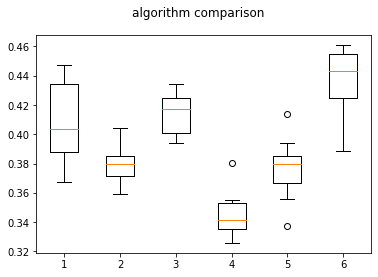

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

results=[]
names=[]
models_std=[]
models_nonstd=[]

lr=LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()


models_std.append(('lr',lr))
models_std.append(('knn',knn))
models_nonstd.append(('rf',rf))
models_std.append(('nb',nb))
models_nonstd.append(('rf_boost',rf_boost))
models_nonstd.append(('gboost',gboost))



for name,model in models_nonstd:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='recall') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    
for name,model in models_std:
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('classifier', model)])
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='recall') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.



#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [71]:
y=df['y']
x=df.drop(columns=['y'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

result_fs=pd.DataFrame(columns=['Description','accuracy-train','accuracy-test','roc-train','roc-test',
                                       'recall-train','recall-test','f1-score-train','f1-score-test'])
count=0

In [72]:
for name,algo in models_std:
    print(algo)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('classifier', algo)]).fit(x,y)
    count=count+1
    y_pred_train=pipe.predict(x_train)
    y_prob_train=pipe.predict_proba(x_train)[:,1]
    y_pred_test=pipe.predict(x_test)
    y_prob_test=pipe.predict_proba(x_test)[:,1]
    
    
    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    print('classification report-test \n',classf_test)

    result_fs=pd.concat([result_fs,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)

for name,algo in models_nonstd:
    print(algo)
    model=algo.fit(x,y)
    y_pred_train=model.predict(x_train)
    y_prob_train=model.predict_proba(x_train)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train,y_pred_train)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train,y_prob_train)
    auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train,y_pred_train)
    recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train,y_pred_train)
    f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train,y_pred_train)
    conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train,y_pred_train)
    classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    print('classification report-test \n',classf_test)

    result_fs=pd.concat([result_fs,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
**********************************lr**********************************
accuracy of base model-train  :   0.902182166320029
accuracy of base model-test :   0.9018766756032172
AUC of base model-train  :   0.9044382316810213
AUC of base model-test  :   0.9106242041931125

confusion matrix-train 
 [[26126   662]
 [ 2301  1202]]

confusion matrix-test 
 [[12825   309]
 [ 1155   631]]

classification report-train 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     26788
           1       0.64      0.34      0.45      3503

    accuracy                           0.90     30291
   macro avg       0.78      0.66      0.70

In [73]:
result_fs

,Description,accuracy-train,accuracy-test,roc-train,roc-test,recall-train,recall-test,f1-score-train,f1-score-test
1,lr,0.902182,0.901877,0.904438,0.910624,0.343134,0.353303,0.447922,0.462949
2,knn,0.923245,0.922520,0.959536,0.960123,0.512989,0.523516,0.607197,0.617978
3,nb,0.873527,0.873525,0.824759,0.830240,0.437910,0.437290,0.444702,0.452885
3,rf,0.999934,1.000000,1.000000,1.000000,0.999429,1.000000,0.999714,1.000000
3,rf_boost,0.900730,0.900201,0.912829,0.916989,0.373965,0.387458,0.465612,0.481726
3,gboost,0.910501,0.908512,0.930394,0.933533,0.429346,0.437290,0.525966,0.533652


# Solving Data Imbalance using SMOTE

In [78]:
y=df['y']
x=df.drop(columns=['y'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

result_fs_sm=pd.DataFrame(columns=['Description','accuracy-train','accuracy-test','roc-train','roc-test',
                                       'recall-train','recall-test','f1-score-train','f1-score-test'])
count=0



C:\sajan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [79]:
for name,algo in models_std:
    print(algo)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('classifier', algo)]).fit(x_train_smote,y_train_smote)
    count=count+1
    y_pred_train=pipe.predict(x_train_smote)
    y_prob_train=pipe.predict_proba(x_train_smote)[:,1]
    y_pred_test=pipe.predict(x_test)
    y_prob_test=pipe.predict_proba(x_test)[:,1]
    
    
    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_smote,y_pred_train)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_smote,y_prob_train)
    auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_smote,y_pred_train)
    recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_smote,y_pred_train)
    f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_smote,y_pred_train)
    conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_smote,y_pred_train)
    classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    print('classification report-test \n',classf_test)

    result_fs_sm=pd.concat([result_fs_sm,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)

for name,algo in models_nonstd:
    print(algo)
    model=algo.fit(x_train_smote,y_train_smote)
    y_pred_train=model.predict(x_train_smote)
    y_prob_train=model.predict_proba(x_train_smote)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_smote,y_pred_train)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_smote,y_prob_train)
    auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_smote,y_pred_train)
    recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_smote,y_pred_train)
    f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_smote,y_pred_train)
    conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_smote,y_pred_train)
    classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    print('classification report-test \n',classf_test)

    result_fs_sm=pd.concat([result_fs_sm,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
**********************************lr**********************************
accuracy of base model-train  :   0.9196705390160995
accuracy of base model-test :   0.8782171581769437
AUC of base model-train  :   0.972744106930858
AUC of base model-test  :   0.8641088450415852

confusion matrix-train 
 [[24855  1916]
 [ 2385 24386]]

confusion matrix-test 
 [[12202   949]
 [  868   901]]

classification report-train 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     26771
           1       0.93      0.91      0.92     26771

    accuracy                           0.92     53542
   macro avg       0.92      0.92      0.92

In [80]:
result_fs_sm

,Description,accuracy-train,accuracy-test,roc-train,roc-test,recall-train,recall-test,f1-score-train,f1-score-test
1,lr,0.919671,0.878217,0.972744,0.864109,0.910911,0.509327,0.918961,0.497928
2,knn,0.946061,0.879826,0.991722,0.821859,0.941018,0.474845,0.945788,0.483732
3,nb,0.868328,0.832306,0.912484,0.721730,0.854171,0.466365,0.866437,0.397399
3,rf,1.000000,0.898257,1.000000,0.922890,1.000000,0.549463,1.000000,0.561525
3,rf_boost,0.920044,0.874598,0.975769,0.876567,0.919540,0.540984,0.920004,0.505680
3,gboost,0.930335,0.886930,0.981363,0.909107,0.937544,0.638214,0.930834,0.572370


In [81]:
result_fs

,Description,accuracy-train,accuracy-test,roc-train,roc-test,recall-train,recall-test,f1-score-train,f1-score-test
1,lr,0.919846,0.876408,0.973302,0.859193,0.911603,0.491432,0.919180,0.490889
2,knn,0.947316,0.875603,0.991976,0.819325,0.942934,0.448314,0.947084,0.466360
3,nb,0.868543,0.826676,0.913883,0.709356,0.853791,0.443892,0.866575,0.383111
3,rf,1.000000,0.898123,1.000000,0.919453,1.000000,0.521835,1.000000,0.553991
3,rf_boost,0.919678,0.874531,0.975832,0.873984,0.921525,0.541736,0.919827,0.511482
3,gboost,0.930607,0.887466,0.981942,0.906610,0.938421,0.614704,0.931145,0.569818


#inference
we can see the results have been improved after applying SMOTE.

# Feature Engineering

In [83]:
data.head()

,age,job,marital,education,defaulter,balance,housing loan,personal loan,contact,day,month,duration,campaign_curr_count,pdays,previous_count,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,4,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,4,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,4,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,4,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,4,may,198,1,-1,0,unknown,no


### target encoding on 'conatct' feature

<function matplotlib.pyplot.show(*args, **kw)>

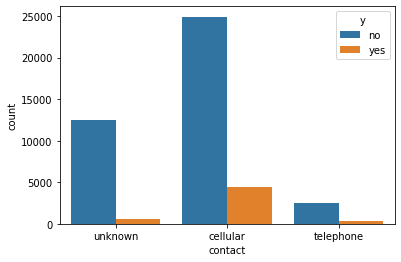

In [134]:
df1=data.copy()
sns.countplot(x='contact',data=tr,hue='y')
plt.show

#people taking term deposits depends on the mode of contact. 

In [135]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [136]:
df1[df1['contact']=='cellular'].groupby(['y']).agg({'y':'count'})

,y
y,
no,24916
yes,4369


In [137]:
df1[df1['contact']=='unknown'].groupby(['y']).agg({'y':'count'})

,y
y,
no,12490
yes,530


In [138]:
df1[df1['contact']=='telephone'].groupby(['y']).agg({'y':'count'})

,y
y,
no,2516
yes,390


In [139]:
390/(390+2516)

0.13420509291121818

In [140]:
#we will create a new feature with value 1) 14.91 for contact='cellular'  (14.91% of them have taken term deposit)
#                                        2) 4  for contact='unknown'  (4% of them have taken term deposit)
#                                        2) 13.42  for contact='telephone'  (13.42% of them have taken term deposit)

In [141]:
def tar_enc_cont(x):
    if x=='cellular':
        return 14.91
    if x=='unknown':
        return 4
    else:
        return 13.42
df1['tar_enc_contact']=df1['contact'].apply(tar_enc_cont)

### creating feature for month beginning/month end/ normal month day

In [145]:

def month_part(x):
    if int(x) in list(range(1,6)):
        return("month_beginning")
    elif int(x) in list(range(6,26)):
        return "normal"
    else:
        return "month_end"
df1['month_end_beg_normal']=df1['day'].apply(month_part)

In [146]:
df1['month_end_beg_normal'].value_counts()

normal             30325
month_beginning     7659
month_end           7227
Name: month_end_beg_normal, dtype: int64

### creating feature for year_end/year_beginning (in portugal financial year= calendar year)

In [154]:
def year_end_beg(x):
    if x=='jan' or x=='feb':
        return("year_beg")
    elif x=='nov' or x=='dec':
        return "year_end"
    else:
        return ("year_normal")

df1['year_end_beg']=df1['month'].apply(year_end_beg)

In [155]:
df1['year_end_beg'].value_counts()

year_normal    36975
year_end        4184
year_beg        4052
Name: year_end_beg, dtype: int64

# Modelling after feature engineering

In [157]:
df2=df.copy()

In [158]:
df2['tar_enc_contact']=df1['tar_enc_contact']
df2['month_end_beg_normal']=df1['month_end_beg_normal']
df2['year_end_beg']=df1['year_end_beg']

In [160]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['tar_enc_contact']=le.fit_transform(df2['tar_enc_contact'])
le=LabelEncoder()
df2['month_end_beg_normal']=le.fit_transform(df2['month_end_beg_normal'])
le=LabelEncoder()
df2['year_end_beg']=le.fit_transform(df2['year_end_beg'])


In [162]:
y=df2['y']
x=df2.drop(columns=['y'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

result_fs_sm_fe=pd.DataFrame(columns=['Description','accuracy-train','accuracy-test','roc-train','roc-test',
                                       'recall-train','recall-test','f1-score-train','f1-score-test'])
count=0



C:\sajan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [163]:
for name,algo in models_std:
    print(algo)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('classifier', algo)]).fit(x_train_smote,y_train_smote)
    count=count+1
    y_pred_train=pipe.predict(x_train_smote)
    y_prob_train=pipe.predict_proba(x_train_smote)[:,1]
    y_pred_test=pipe.predict(x_test)
    y_prob_test=pipe.predict_proba(x_test)[:,1]
    
    
    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_smote,y_pred_train)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_smote,y_prob_train)
    auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_smote,y_pred_train)
    recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_smote,y_pred_train)
    f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_smote,y_pred_train)
    conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_smote,y_pred_train)
    classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    print('classification report-test \n',classf_test)

    result_fs_sm_fe=pd.concat([result_fs_sm_fe,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)

for name,algo in models_nonstd:
    print(algo)
    model=algo.fit(x_train_smote,y_train_smote)
    y_pred_train=model.predict(x_train_smote)
    y_prob_train=model.predict_proba(x_train_smote)[:,1]
    y_pred_test=model.predict(x_test)
    y_prob_test=model.predict_proba(x_test)[:,1]

    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
    import sklearn.metrics as mt
    accuracy_train=accuracy_score(y_train_smote,y_pred_train)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    auc_train=roc_auc_score(y_train_smote,y_prob_train)
    auc_test=roc_auc_score(y_test,y_prob_test)
    recall_train=mt.recall_score(y_train_smote,y_pred_train)
    recall_test=mt.recall_score(y_test,y_pred_test)
    f1_train=mt.f1_score(y_train_smote,y_pred_train)
    f1_test=mt.f1_score(y_test,y_pred_test)
    conf_train=confusion_matrix(y_train_smote,y_pred_train)
    conf_test=confusion_matrix(y_test,y_pred_test)
    classf_train=classification_report(y_train_smote,y_pred_train)
    classf_test=classification_report(y_test,y_pred_test)
    print(name.center(70,'*'))
    print('accuracy of base model-train  :  ', accuracy_train)
    print('accuracy of base model-test :  ', accuracy_test)
    print('AUC of base model-train  :  ', auc_train)
    print('AUC of base model-test  :  ', auc_test)
    print()
    print('confusion matrix-train \n',conf_train)
    print()
    print('confusion matrix-test \n',conf_test)
    print()
    print('classification report-train \n',classf_train)
    print('classification report-test \n',classf_test)

    result_fs_sm_fe=pd.concat([result_fs_sm_fe,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
**********************************lr**********************************
accuracy of base model-train  :   0.9234743541744664
accuracy of base model-test :   0.8871983914209115
AUC of base model-train  :   0.9762735531362062
AUC of base model-test  :   0.8722642587357601

confusion matrix-train 
 [[25031  1679]
 [ 2409 24301]]

confusion matrix-test 
 [[12429   783]
 [  900   808]]

classification report-train 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     26710
           1       0.94      0.91      0.92     26710

    accuracy                           0.92     53420
   macro avg       0.92      0.92      0.9

In [164]:
result_fs_sm_fe

,Description,accuracy-train,accuracy-test,roc-train,roc-test,recall-train,recall-test,f1-score-train,f1-score-test
1,lr,0.923474,0.887198,0.976274,0.872264,0.909809,0.473068,0.922414,0.489845
2,knn,0.947080,0.883311,0.992068,0.821753,0.938300,0.445550,0.946611,0.466442
3,nb,0.868813,0.836327,0.911959,0.718706,0.858405,0.447892,0.867433,0.385196
3,rf,1.000000,0.903150,1.000000,0.922624,1.000000,0.526932,1.000000,0.554700
3,rf_boost,0.922576,0.882373,0.977450,0.878672,0.918195,0.516393,0.922235,0.501279
3,gboost,0.934070,0.893566,0.983238,0.911330,0.939012,0.624707,0.934394,0.573348


#inference:
we can see after feature engineering , performance has increased.
as gradient boosting is giving the best results out of all, we can select it as our final model and do hyperparameter tuning.

### hyperparamter tuning for gboost

In [202]:
x_train_smote_df=pd.DataFrame(x_train_smote,columns=x_train.columns)
y_train_smote_df=pd.DataFrame(y_train_smote,columns=['y'])
y_test_df=pd.DataFrame(y_test,columns=['y'])

In [203]:
x1=pd.concat([x_train_smote_df,x_test],axis=0)
y1=pd.concat([y_train_smote_df,y_test_df],axis=0)

In [205]:
print(x_train_smote_df.shape)
print(x_test.shape)
print(x1.shape)

print(y_train_smote_df.shape)
print(y_test.shape)

print(y1.shape)

(53420, 35)
(14920, 35)
(68340, 35)
(53420, 1)
(14920,)
(68340, 1)


In [211]:
auc_val=[]
for val in range(1,100):
    print(val)
    gboost=GradientBoostingClassifier(n_estimators=val)
    result=cross_val_score(gboost,x1,y1,scoring='recall',cv=5)
    auc_val.append(np.mean(result))
    print(np.mean(result))

1


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.0
2


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.0
3


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.4856769321889562
4


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.6165789346920697
5


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.705785350904577
6


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.7596586136684554
7


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.7896032378256174
8


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.7938258702851313
9


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.7993503223250746
10


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8025523794499019
11


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8031506302424493
12


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8093088229485002
13


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8118422315378668
14


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8159948810872532
15


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8204284281564721
16


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8240527417165632
17


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8315480828967166
18


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8331663641689481
19


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8368259694735078
20


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8385497544870976
21


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8424558385733318
22


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.843476246736597
23


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8461856806409178
24


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8498805776899461
25


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8499157208375957
26


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8503729656321563
27


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8516396172987996
28


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8545956228578065
29


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8558271004191296
30


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8570938821079894
31


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8574456231611919
32


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8586067153626697
33


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8611404892525492
34


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8598734351361884
35


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8624073823890231
36


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8620202691014092
37


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.864061159726349
38


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8632518023865392
39


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8643778690795159
40


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8644832056494529
41


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8648351200656104
42


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8649405433170252
43


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8648700774672367
44


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8658905537373773
45


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8662775308112407
46


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8677202139843722
47


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8683184709684537
48


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8692685371126128
49


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8683535212430916
50


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8688109889328803
51


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8697258190563781
52


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8686701191486442
53


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8691274691992849
54


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8698663854554425
55


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8707108549852313
56


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8711330928458928
57


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8723296253886581
58


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8725758441258996
59


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8729277213928525
60


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8734203198472226
61


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.874229646229362
62


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8739129554507976
63


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.874088894084274
64


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8740888135943304
65


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8742999325246611
66


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8740183539360761
67


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8742998396516495
68


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8745461884111074
69


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8753908065377152
70


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8753203468794606
71


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8756370562326273
72


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8756018821273072
73


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8757073796771314
74


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8754609999600026
75


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8750739176300592
76


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8753905526848162
77


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8763055252135986
78


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8767629867118533
79


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8764814390809386
80


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8772203862947668
81


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8772204234439716
82


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.877220342954028
83


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8775018782018744
84


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.876938782940045
85


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8769740189607065
86


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8776425870062237
87


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8778888800418745
88


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8779240851048655
89


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8782759190310795
90


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8785574666619942
91


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8785926531503826
92


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8779944209324377
93


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8785574480873917
94


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8789444870765966
95


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8787685608261884
96


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8783814661131766
97


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8791556307730637
98


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.879085257796287
99


C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\sajan\lib\sit

0.8788741079082856


In [214]:
print(np.argmax(auc_val))

96


In [216]:
y=df2['y']
x=df2.drop(columns=['y'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

C:\sajan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [217]:
result_fs_sm_fe_hy=pd.DataFrame(columns=['Description','accuracy-train','accuracy-test','roc-train','roc-test',
                                       'recall-train','recall-test','f1-score-train','f1-score-test'])
count=0

from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(n_estimators=96)
gboost.fit(x_train_smote,y_train_smote)
y_pred_train=model.predict(x_train_smote)
y_prob_train=model.predict_proba(x_train_smote)[:,1]
y_pred_test=model.predict(x_test)
y_prob_test=model.predict_proba(x_test)[:,1]

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
import sklearn.metrics as mt
accuracy_train=accuracy_score(y_train_smote,y_pred_train)
accuracy_test=accuracy_score(y_test,y_pred_test)
auc_train=roc_auc_score(y_train_smote,y_prob_train)
auc_test=roc_auc_score(y_test,y_prob_test)
recall_train=mt.recall_score(y_train_smote,y_pred_train)
recall_test=mt.recall_score(y_test,y_pred_test)
f1_train=mt.f1_score(y_train_smote,y_pred_train)
f1_test=mt.f1_score(y_test,y_pred_test)
conf_train=confusion_matrix(y_train_smote,y_pred_train)
conf_test=confusion_matrix(y_test,y_pred_test)
classf_train=classification_report(y_train_smote,y_pred_train)
classf_test=classification_report(y_test,y_pred_test)
print(name.center(70,'*'))
print('accuracy of base model-train  :  ', accuracy_train)
print('accuracy of base model-test :  ', accuracy_test)
print('AUC of base model-train  :  ', auc_train)
print('AUC of base model-test  :  ', auc_test)
print()
print('confusion matrix-train \n',conf_train)
print()
print('confusion matrix-test \n',conf_test)
print()
print('classification report-train \n',classf_train)
print('classification report-test \n',classf_test)

result_fs_sm_fe_hy=pd.concat([result_fs_sm_fe_hy,pd.DataFrame({"Description":name,'accuracy-train':accuracy_train,'accuracy-test':accuracy_test,
                                  'roc-train':auc_train,'roc-test':auc_test,
                                       'recall-train':recall_train,'recall-test':recall_test,
                                  'f1-score-train':f1_train,'f1-score-test':f1_test },index=[count])],axis=0)
    

********************************gboost********************************
accuracy of base model-train  :   0.9314338097732545
accuracy of base model-test :   0.8978552278820375
AUC of base model-train  :   0.9824989329520832
AUC of base model-test  :   0.9165855381191939

confusion matrix-train 
 [[24801  1925]
 [ 1740 24986]]

confusion matrix-test 
 [[12281   915]
 [  609  1115]]

classification report-train 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     26726
           1       0.93      0.93      0.93     26726

    accuracy                           0.93     53452
   macro avg       0.93      0.93      0.93     53452
weighted avg       0.93      0.93      0.93     53452

classification report-test 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     13196
           1       0.55      0.65      0.59      1724

    accuracy                           0.90     14920
   macro avg